## Part 1 ‑ Exploratory data analysis ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
login_df = pd.read_json(r'logins.json')
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
login_df = login_df.sort_values(by='login_time')
login_size_df = login_df.set_index('login_time').resample('15min').size().reset_index()
login_size_df = login_size_df.rename(columns={0:'Size'}) 
login_size_df.head()

,login_time,Size
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [4]:
login_size_df['login_time'].dt.month.unique()

array([1, 2, 3, 4], dtype=int64)

We can see we have data from January to April

In [5]:
login_size_df['Hour'] = login_size_df['login_time'].dt.hour
login_size_df['Day'] = login_size_df['login_time'].dt.day
login_size_df['Week'] = login_size_df['login_time'].dt.week
login_size_df['Month'] = login_size_df['login_time'].dt.month

In [6]:
login_size_df.head()

,login_time,Size,Hour,Day,Week,Month
0,1970-01-01 20:00:00,2,20,1,1,1
1,1970-01-01 20:15:00,6,20,1,1,1
2,1970-01-01 20:30:00,9,20,1,1,1
3,1970-01-01 20:45:00,7,20,1,1,1
4,1970-01-01 21:00:00,1,21,1,1,1


In [7]:
df_hr = login_size_df.groupby('Hour')['Size'].sum().reset_index()
df_hr.head()

,Hour,Size
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034


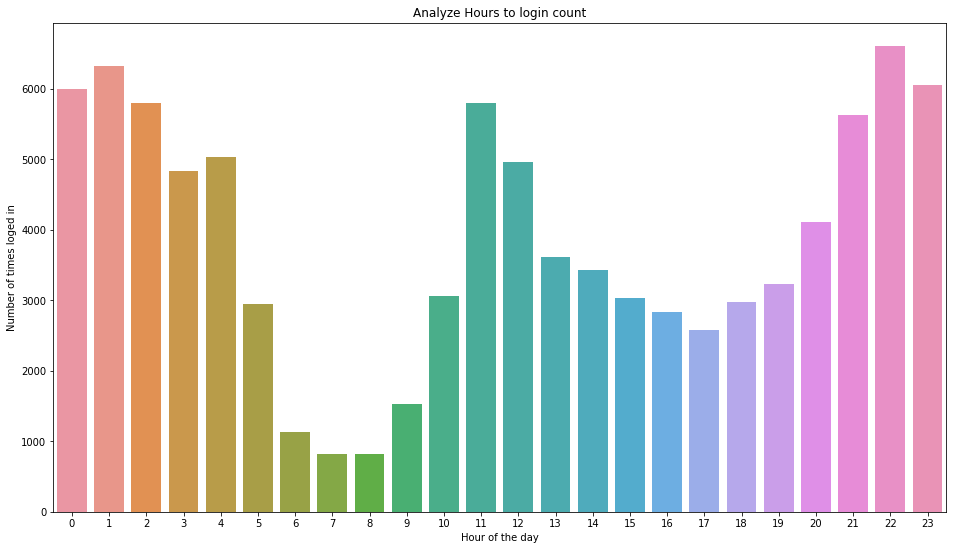

In [8]:
plt.figure(figsize = (16,9))
sns.barplot(x="Hour", y="Size", data=df_hr)
plt.xlabel('Hour of the day')
plt.ylabel('Number of times loged in')
plt.title('Analyze Hours to login count')
plt.show()


We see that later in the night most logins happen

In [9]:
c = login_size_df.groupby(['Month','Day'])['Size'].sum().reset_index()
c = c[c['Month'] != 4]
c = c.pivot('Month','Day','Size')
c

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Month,,,,,,,,,,,,,,,,,,,,,
1,112.0,681.0,793.0,788.0,459.0,536.0,648.0,625.0,881.0,1054.0,...,605.0,845.0,926.0,852.0,462.0,565.0,657.0,674.0,711.0,805.0
2,870.0,599.0,464.0,467.0,688.0,990.0,1102.0,1262.0,514.0,590.0,...,1430.0,653.0,642.0,722.0,841.0,1028.0,1395.0,NaN,NaN,NaN
3,1273.0,637.0,714.0,893.0,914.0,1140.0,1666.0,1434.0,619.0,644.0,...,1472.0,735.0,750.0,774.0,873.0,1142.0,1488.0,1523.0,704.0,770.0


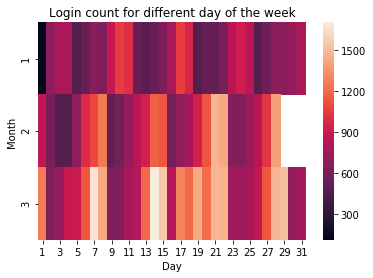

In [10]:
sns.heatmap(c)
plt.title('Login count for different day of the week')
plt.show()

We see from the above heat map that March month has more logins than January & February. Also staring of the week has more logins.

## Part 3 ‑ Predictive modeling ##

In [61]:
import json

with open('ultimate_data_challenge.json') as json_data:
    data = json.load(json_data)


In [62]:
ultimate_data_df = pd.DataFrame.from_dict(data)
ultimate_data_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [63]:
ultimate_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [64]:
df = ultimate_data_df

In [65]:
ultimate_data_df = df.dropna(axis=0)
ultimate_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [66]:
#import datetime as dt
#ultimate_data_df['DateDiff']  = pd.to_datetime(ultimate_data_df['last_trip_date']) - pd.to_datetime(ultimate_data_df['signup_date'])
#ultimate_data_df['DateDiff'] = ultimate_data_df['DateDiff'].astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)
#ultimate_data_df['Active'] = ultimate_data_df['DateDiff'].apply(lambda x: 'Y' if x > 30 else 'N')

In [67]:
ultimate_data_df[['last_trip_date']].max()

last_trip_date    2014-07-01
dtype: object

In [68]:
len(ultimate_data_df[ultimate_data_df['last_trip_date']>'2014-06-01'])

16608

In [69]:
len(ultimate_data_df[ultimate_data_df['last_trip_date']<'2014-06-01'])

24410

In [70]:
ultimate_data_df['Active'] = ultimate_data_df['last_trip_date'].apply(lambda x: 1 if x > '2014-06-01' else 0)
#ultimate_data_df[ultimate_data_df['last_trip_date']>'2014-06-01']

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
import numpy as np
np.sum(ultimate_data_df['Active'])/len(ultimate_data_df['Active'])

0.40072385088671736

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y = ultimate_data_df['Active'].values
X = ultimate_data_df.drop(['last_trip_date','signup_date','Active'],axis=1)

X1 = pd.get_dummies(X, columns = ['city', 'phone', 'ultimate_black_user'])
df_final = X1.drop(['city_Winterfell','phone_iPhone','ultimate_black_user_False'], axis = 1)
#df_final = df_final.dropna(axis=0)
X = df_final.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3944  972]
 [1204 2169]]
             precision    recall  f1-score   support

          0       0.77      0.80      0.78      4916
          1       0.69      0.64      0.67      3373

avg / total       0.74      0.74      0.74      8289

